In [191]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
training_data = pd.read_csv('btc-train.csv')
training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,437.916992,439.653015,432.319000,435.122986,435.122986,74895800
1,2016-03-02,435.131012,435.916992,423.989014,423.989014,423.989014,74955296
2,2016-03-03,423.911987,425.372986,419.411011,421.651001,421.651001,100484000
3,2016-03-04,421.835999,425.178009,410.938995,410.938995,410.938995,90856096
4,2016-03-05,410.781006,411.256989,394.035004,400.570007,400.570007,135384992


In [193]:
training_data =training_data.drop(['Adj Close'],axis=1)

In [194]:
training_data = training_data.iloc[:, 4:5]

training_data.shape
training_data.head()

,Close
0,435.122986
1,423.989014
2,421.651001
3,410.938995
4,400.570007


In [195]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

In [196]:
# Getting the inputs and outputs

x_train = training_data[0:1471]
y_train = training_data[1:1472]

print(x_train.shape)
print(y_train.shape)

(1471, 1)
(1471, 1)


In [197]:
# reshaping

x_train = np.reshape(x_train, (1471, 1, 1))

print(x_train.shape)

(1471, 1, 1)


In [198]:

# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [199]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 2/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 3/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 4/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 5/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 6/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 7/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 8/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 9/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 10/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 11/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 12/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 13/200
46/46 [=================

46/46 [==============================] - 0s 1ms/step - loss: 2.8931e-04
Epoch 194/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8790e-04
Epoch 195/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8867e-04
Epoch 196/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8752e-04
Epoch 197/200
46/46 [==============================] - 0s 1ms/step - loss: 2.9540e-04
Epoch 198/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8798e-04
Epoch 199/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8906e-04
Epoch 200/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8826e-04


In [200]:
# getting the real bitcoin of 2021 i.e., importing the test dataset

test_data = pd.read_csv('btc-test.csv')
test_data =test_data.drop(['Adj Close'],axis=1)
test_data =test_data.dropna()
real_stock_price = test_data.iloc[:,4:5]
real_stock_price.head()

,Close
0,8755.246094
1,9078.762695
2,9122.545898
3,8909.954102
4,8108.116211


In [201]:
# getting the predicted bitcoin price of 2021

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (356, 1, 1))



predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

In [202]:
# Evaluating the RNN model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

4611.645614810169


In [203]:
from sklearn.metrics import r2_score
r2_score(real_bitcoin_price, predicted_bitcoin_price)

0.8434656835192368

In [175]:
#print(real_stock_price.shape)

In [176]:
#real_stock_price.fillna(real_stock_price.mean())

In [177]:
#print(predicted_stock_price.shape)

In [178]:
#predicted_stock_price = pd.DataFrame(predicted_stock_price)

In [204]:
predicted_stock_price

array([[ 8812.049 ],
       [ 9135.973 ],
       [ 9179.75  ],
       [ 8967.05  ],
       [ 8161.9326],
       [ 7976.154 ],
       [ 7962.1343],
       [ 7963.847 ],
       [ 4990.313 ],
       [ 5590.0977],
       [ 5222.462 ],
       [ 5416.6523],
       [ 5034.482 ],
       [ 5248.0166],
       [ 5260.9727],
       [ 6225.31  ],
       [ 6232.989 ],
       [ 6219.11  ],
       [ 5859.908 ],
       [ 6453.196 ],
       [ 6775.494 ],
       [ 6721.121 ],
       [ 6756.9155],
       [ 6507.3286],
       [ 6276.9395],
       [ 5952.83  ],
       [ 6466.887 ],
       [ 6475.7974],
       [ 6645.954 ],
       [ 6835.001 ],
       [ 6774.061 ],
       [ 6909.7524],
       [ 6832.476 ],
       [ 7318.413 ],
       [ 7222.048 ],
       [ 7381.3643],
       [ 7349.03  ],
       [ 6907.697 ],
       [ 6901.2124],
       [ 7014.4883],
       [ 6887.0054],
       [ 6884.367 ],
       [ 6681.706 ],
       [ 7161.802 ],
       [ 7304.1504],
       [ 7235.197 ],
       [ 6924.3496],
       [ 6922

In [205]:
#real_stock_price=real_stock_price.values

In [206]:
#predicted_stock_price=predicted_stock_price.values

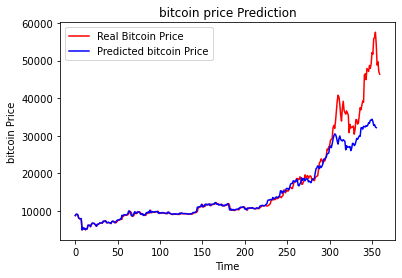

In [207]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted bitcoin Price')
plt.title('bitcoin price Prediction')
plt.xlabel('Time')
plt.ylabel('bitcoin Price')
plt.legend()
plt.show()

In [209]:
# getting the real stock price of 2016 - 2020

training_data = pd.read_csv('btc-train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,437.916992,439.653015,432.319000,435.122986,435.122986,74895800
1,2016-03-02,435.131012,435.916992,423.989014,423.989014,423.989014,74955296
2,2016-03-03,423.911987,425.372986,419.411011,421.651001,421.651001,100484000
3,2016-03-04,421.835999,425.178009,410.938995,410.938995,410.938995,90856096
4,2016-03-05,410.781006,411.256989,394.035004,400.570007,400.570007,135384992


In [210]:
training_data =training_data.drop(['Adj Close'],axis=1)

In [211]:
training_data = training_data.iloc[:, 4:5]

training_data.shape
training_data.head()

,Close
0,435.122986
1,423.989014
2,421.651001
3,410.938995
4,400.570007


In [212]:
# getting the predicted stock price of 2016-2020

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

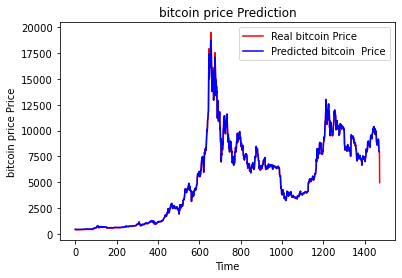

In [213]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real bitcoin Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted bitcoin  Price')
plt.title('bitcoin price Prediction')
plt.xlabel('Time')
plt.ylabel('bitcoin price Price')
plt.legend()
plt.show()

In [214]:
y_train.shape

(1471, 1)

In [215]:
predicted_stock_price.shape

(1471, 1)